In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submit=pd.read_csv('sample_submission.csv')

In [3]:
train.shape

(42000, 785)

In [4]:
x_train=train.drop('label',axis=1)

In [5]:
y_train=train['label']

In [6]:
y_train.value_counts() #0~9까지 있음

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [7]:
print(x_train.shape)
print(y_train.shape)

(42000, 784)
(42000,)


In [8]:
x_train.isnull().any().sum()

0

In [9]:
x_train=x_train.values.reshape(-1,28,28,1)
print(x_train.shape)

(42000, 28, 28, 1)


In [10]:
x_train=x_train.astype('float32')/255.

In [11]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,num_classes=10)
print(y_train[5])

Using TensorFlow backend.
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,BatchNormalization,Flatten,MaxPooling2D
model=Sequential()
model.add(Conv2D(64,3,activation='relu',
                 padding='same',input_shape=(28,28,1)))
model.add(Conv2D(32,3,activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32,3,activation='relu',padding='same'))
model.add(Conv2D(16,3,activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)    

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,validation_split=0.2,batch_size=64)

Instructions for updating:
Use tf.cast instead.
Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 128s 4ms/step - loss: 0.3914 - acc: 0.8751 - val_loss: 0.0853 - val_acc: 0.9718
Epoch 2/10
33600/33600 [==============================] - 120s 4ms/step - loss: 0.1356 - acc: 0.9595 - val_loss: 0.0584 - val_acc: 0.9815
Epoch 3/10
33600/33600 [==============================] - 122s 4ms/step - loss: 0.0982 - acc: 0.9705 - val_loss: 0.0485 - val_acc: 0.9829
Epoch 4/10
33600/33600 [==============================] - 121s 4ms/step - loss: 0.0816 - acc: 0.9761 - val_loss: 0.0414 - val_acc: 0.9873
Epoch 5/10
33600/33600 [==============================] - 121s 4ms/step - loss: 0.0729 - acc: 0.9795 - val_loss: 0.0426 - val_acc: 0.9868
Epoch 6/10
33600/33600 [==============================] - 121s 4ms/step - loss: 0.0666 - acc: 0.9803 - val_loss: 0.0404 - val_acc: 0.9873
Epoch 7/10
33600/33600 [==============================] - 120s 4ms/step - l

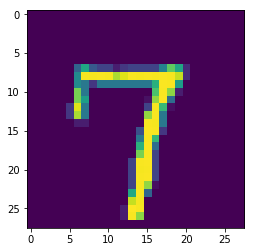

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_train[6][:,:,0])
plt.show()

In [17]:
submission=submit.copy()
x=test.values.reshape(-1,28,28,1)
x=x/255.0
predict=model.predict(x)
test['label']=np.argmax(predict,axis=1)
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [18]:
test['label'].value_counts()

1    3176
7    2897
3    2831
2    2828
9    2798
0    2761
6    2753
8    2730
4    2720
5    2506
Name: label, dtype: int64

In [19]:
submit['Label']=test['label']

In [20]:
submit.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [21]:
submit.to_csv('mnist_submission.csv',index=False)